Diagnosis
0    0.5
1    0.5
Name: proportion, dtype: float64
Train Set Class Distribution:
 Diagnosis
1    0.500375
0    0.499625
Name: proportion, dtype: float64

Test Set Class Distribution:
 Diagnosis
0    0.500562
1    0.499438
Name: proportion, dtype: float64
Epoch 1/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 7s 57ms/step - AUC: 0.5135 - accuracy: 0.5270 - loss: 1.2484 - val_AUC: 0.6377 - val_accuracy: 0.5618 - val_loss: 0.6933 - learning_rate: 0.0500
Epoch 2/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - AUC: 0.6593 - accuracy: 0.6385 - loss: 0.7061 - val_AUC: 0.8745 - val_accuracy: 0.7940 - val_loss: 0.4743 - learning_rate: 0.0500
Epoch 3/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - AUC: 0.7866 - accuracy: 0.7262 - loss: 0.5669 - val_AUC: 0.9039 - val_accuracy: 0.8127 - val_loss: 0.4247 - learning_rate: 0.0500
Epoch 4/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - AUC: 0.8321 - accuracy: 0.7650 - loss: 0.5184 - val_AUC: 0.9093 - val_accuracy: 0.8127 - val_loss: 0.4129 - learning_rate: 0.0500

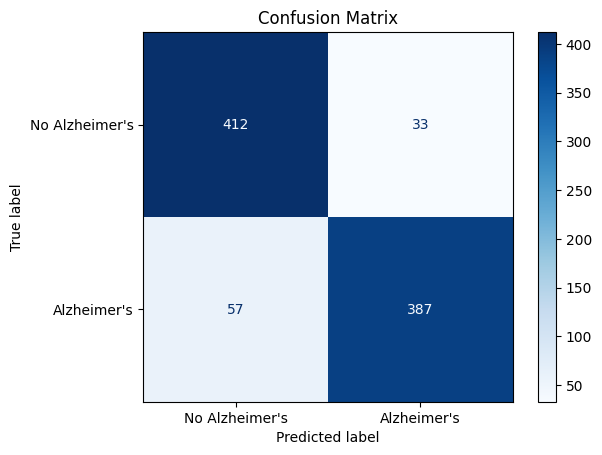

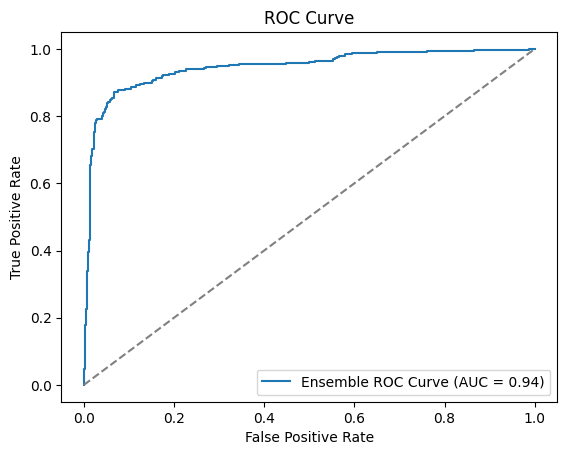

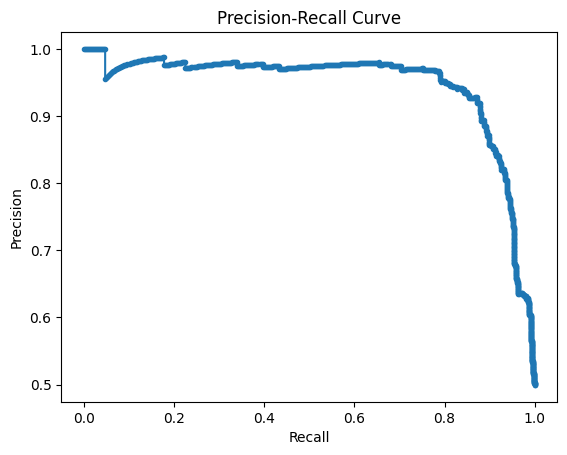

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


  0%|          | 0/100 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━

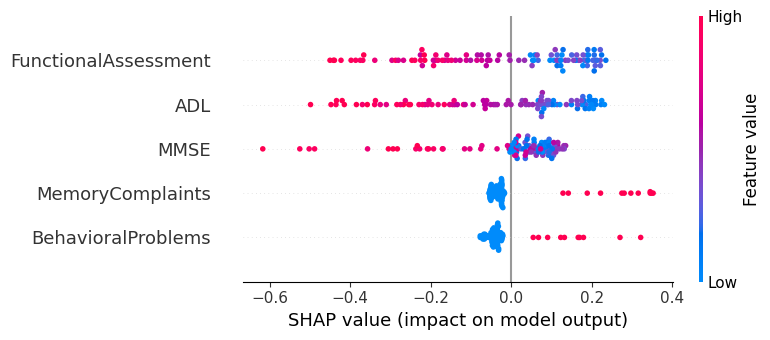

rf_shap_values shape: (889, 5)
X_test_np shape: (889, 5)


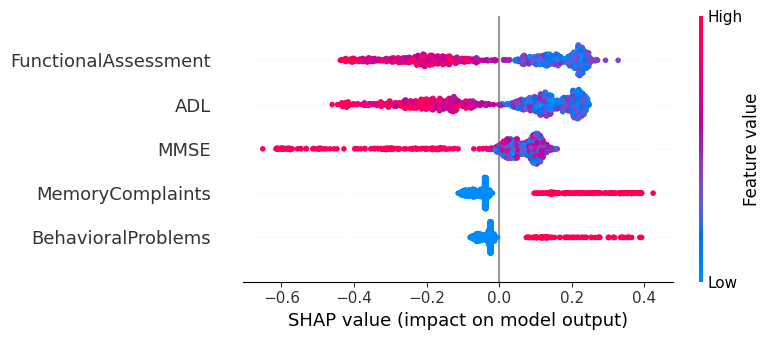

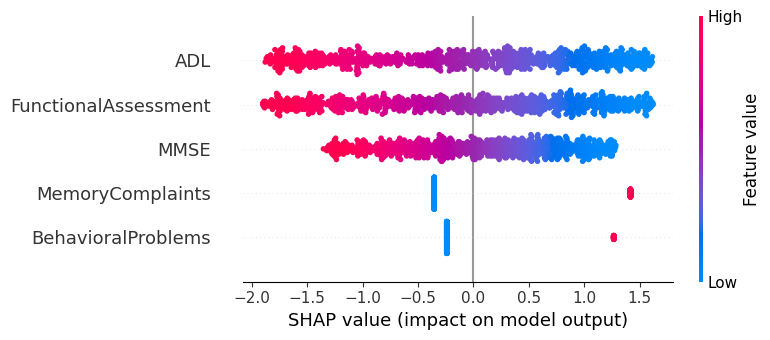

dnn_shap_mean shape: (5,)
rf_shap_mean shape: (5,)
lr_shap_mean shape: (5,)


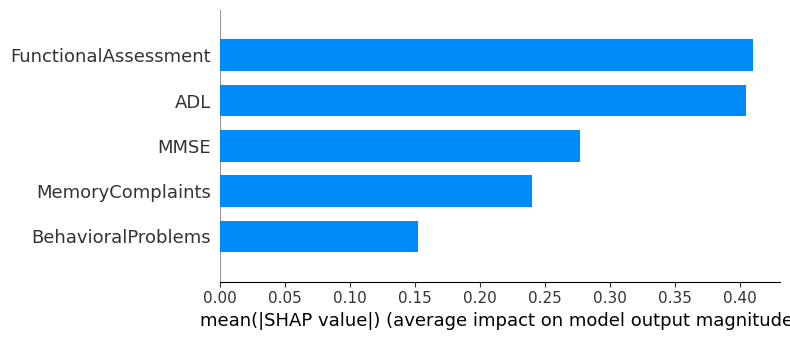

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input, MultiHeadAttention, LayerNormalization, Add, Flatten, Reshape
import shap
import matplotlib.pyplot as plt
import numpy as np

# Load the preprocessed dataset
file_path = 'preprocessed_corrected_dataset.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Define features and target
X = data.drop(columns=['Diagnosis'])  # Replace 'Diagnosis_1' with your target column name
y = data['Diagnosis']

# Split the dataset
# Extract top 5 features
top_features = ["BehavioralProblems", "MemoryComplaints", "FunctionalAssessment", "ADL", "MMSE"]
X_top_features = X[top_features]

print(data['Diagnosis'].value_counts(normalize=True))

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_top_features, y, test_size=0.4, random_state=42, stratify=y
)

print("Train Set Class Distribution:\n", y_train.value_counts(normalize=True))
print("\nTest Set Class Distribution:\n", y_test.value_counts(normalize=True))
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Layer


# Corrected Maxout Layer
class Maxout(Layer):
    def __init__(self, units, num_pieces, **kwargs):
        super(Maxout, self).__init__(**kwargs)
        self.units = units
        self.num_pieces = num_pieces

    def build(self, input_shape):
        self.kernel = self.add_weight(
            name='kernel',
            shape=(int(input_shape[-1]), self.units * self.num_pieces),
            initializer='glorot_uniform',
            trainable=True
        )
        self.bias = self.add_weight(
            name='bias',
            shape=(self.units * self.num_pieces,),
            initializer='zeros',
            trainable=True
        )
        self.built = True

    def call(self, inputs):
        outputs = K.dot(inputs, self.kernel) + self.bias
        outputs = K.reshape(outputs, (-1, self.units, self.num_pieces))
        outputs = K.max(outputs, axis=2)
        return outputs

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.units)

def build_model(input_dim):
    inputs = Input(shape=(input_dim,))

    # Increased units and adjusted dropout
    # First maxout block with more units
    x = Maxout(512, num_pieces=6)(inputs)  # Increased units and pieces
    x = BatchNormalization(momentum=0.9)(x)
    x = Dropout(0.5)(x)  # Reduced dropout

    # Second maxout block
    x = Maxout(256, num_pieces=6)(x)
    x = BatchNormalization(momentum=0.9)(x)
    x = Dropout(0.5)(x)

    # Third maxout block
    x = Maxout(128, num_pieces=6)(x)
    x = BatchNormalization(momentum=0.9)(x)
    x = Dropout(0.5)(x)

    # Self-Attention block with adjusted parameters
    reshaped = Reshape((32, 4))(x)  # Adjusted shape
    attn_output = MultiHeadAttention(num_heads=8, key_dim=16)(reshaped, reshaped)  # More heads and larger key_dim
    x = Add()([attn_output, reshaped])
    x = LayerNormalization()(x)

    x = Flatten()(x)

    # Final maxout block
    x = Maxout(128, num_pieces=6)(x)  # Increased units
    x = BatchNormalization(momentum=0.9)(x)
    x = Dropout(0.3)(x)

    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs, outputs)

    # Use a custom learning rate and optimizer configuration
    optimizer = tf.keras.optimizers.Adam(
        learning_rate=0.05,
        beta_1=0.9,
        beta_2=0.999,
        epsilon=1e-07
    )

    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy', 'AUC']
    )
    return model

# Build the model
model = build_model(X_train.shape[1])

# Modified callback parameters
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=12,  # Increased patience
    restore_best_weights=True,
    min_delta=0.001  # Minimum change to qualify as an improvement
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.2,  # More gentle reduction
    patience=5,
    verbose=1,
    min_delta=0.001,
    min_lr=0.00001
)

model_checkpoint = ModelCheckpoint(
    'best_model.keras',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

# Modified training parameters
history = model.fit(
    X_train, y_train,
    validation_split=0.20,  # Reduced validation split
    epochs=150,  # Increased epochs
    batch_size=32,  # Reduced batch size
    callbacks=[early_stopping, reduce_lr, model_checkpoint],
    verbose=1
)

# Evaluate the DNN model
test_loss, test_accuracy, test_auc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}, Test AUC: {test_auc:.4f}")

# Step 3: Train Random Forest and Logistic Regression
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train, y_train)

# Ensemble predictions
def ensemble_predictions(X):
    rf_preds = rf_model.predict_proba(X)[:, 1]
    lr_preds = lr_model.predict_proba(X)[:, 1]
    dnn_preds = model.predict(X).flatten()

    final_preds = (rf_preds + lr_preds + dnn_preds) / 3
    return final_preds

ensemble_preds = ensemble_predictions(X_test)
ensemble_auc = auc(*roc_curve(y_test, ensemble_preds)[:2])
print(f"Ensemble AUC: {ensemble_auc:.4f}")


# Convert ensemble probabilities to binary predictions
y_pred = (ensemble_preds > 0.5).astype(int)
# Visualizations
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate specific metrics
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
report = classification_report(y_test, y_pred, target_names=["No Alzheimer's", "Alzheimer's"])
print("\nClassification Report:\n")
print(report)
# Confusion Matrix
y_pred = (ensemble_preds > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Alzheimer's", "Alzheimer's"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, ensemble_preds)
plt.figure()
plt.plot(fpr, tpr, label=f'Ensemble ROC Curve (AUC = {ensemble_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, ensemble_preds)
plt.figure()
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title("Precision-Recall Curve")
plt.show()

import shap
import numpy as np

# Ensure X_train and X_test are numeric and have the correct shape
X_train_np = np.array(X_train, dtype=np.float32)  # Convert to NumPy and ensure float32 type
X_test_np = np.array(X_test, dtype=np.float32)

# Subset X_test to match top features
X_test_top_features = X_test[top_features]

# Define the SHAP prediction function for the DNN
def dnn_predict(x):
    return model.predict(x, batch_size=64).flatten()  # Ensure 1D array of probabilities

# SHAP Explainability for DNN
dnn_explainer = shap.KernelExplainer(dnn_predict, X_train_np[:100])  # Use a sample for efficiency
dnn_shap_values = dnn_explainer.shap_values(X_test_np[:100])  # Explain a sample of test data

# Visualize SHAP values for the DNN
shap.summary_plot(dnn_shap_values, X_test_np[:100], feature_names=top_features)

# SHAP Explainability for Random Forest
rf_explainer = shap.TreeExplainer(rf_model)
rf_shap_values = rf_explainer.shap_values(X_test_np)

rf_shap_values_top = rf_shap_values[...,1]

print(f"rf_shap_values shape: {np.array(rf_shap_values_top).shape}")
print(f"X_test_np shape: {X_test_np.shape}")

# Visualize SHAP values for Random Forest
shap.summary_plot(rf_shap_values_top, X_test_np, feature_names=top_features)

# SHAP Explainability for Logistic Regression
lr_explainer = shap.LinearExplainer(lr_model, X_train_np)
lr_shap_values = lr_explainer.shap_values(X_test_np)

# Visualize SHAP values for Logistic Regression
shap.summary_plot(lr_shap_values, X_test_np, feature_names=top_features)

# Combine SHAP values for Ensemble
dnn_shap_mean = np.mean(np.abs(dnn_shap_values), axis=0)
rf_shap_mean = np.mean(np.abs(rf_shap_values_top), axis=0)
lr_shap_mean = np.mean(np.abs(lr_shap_values), axis=0)

print(f"dnn_shap_mean shape: {dnn_shap_mean.shape}")
print(f"rf_shap_mean shape: {rf_shap_mean.shape}")
print(f"lr_shap_mean shape: {lr_shap_mean.shape}")

# Calculate ensemble SHAP values
ensemble_shap_mean = (dnn_shap_mean + rf_shap_mean + lr_shap_mean) / 3

# Expand ensemble_shap_mean to match (800, 5)
ensemble_shap_values_expanded = np.tile(ensemble_shap_mean, (X_test.shape[0], 1))

# Visualize
shap.summary_plot(
    ensemble_shap_values_expanded,
    X_test,
    feature_names=top_features,
    plot_type='bar'
)